import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

load the data

In [3]:
base_dir="Blood cell Cancer [ALL]"
batch=32
image_size=180

split the data into trining and validation 

In [4]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(image_size, image_size),
    batch_size=batch
)

val_ds=tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(image_size, image_size),
    batch_size=batch
)

Found 3210 files belonging to 4 classes.
Using 2568 files for training.
Found 3210 files belonging to 4 classes.
Using 642 files for validation.


print blood cell catagory 

In [5]:
blood_cell = train_ds.class_names

print(f'Blood cell catagories: {blood_cell}')

Blood cell catagories: ['Benign', '[Malignant] Pre-B', '[Malignant] Pro-B', '[Malignant] early Pre-B']


visualize(blood_cell)

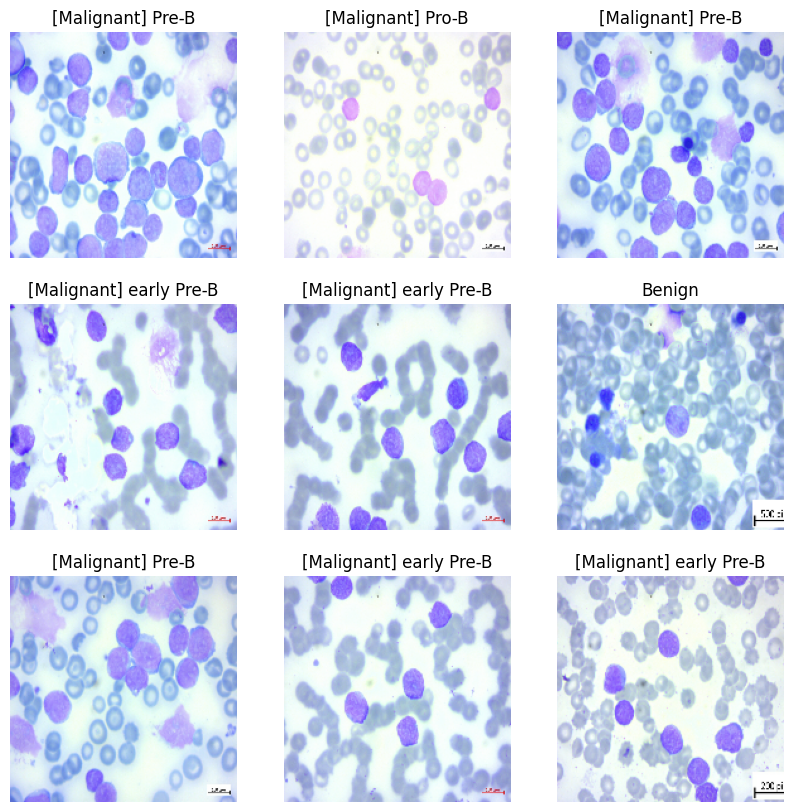

In [6]:
i=0
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(blood_cell[labels[i]])
    plt.axis('off')

data autotone

In [7]:
AUTOTOUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTOUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTOUNE)

data augmentation


In [9]:
data_augmentation=tf.keras.Sequential([
                                       layers.RandomFlip('horizontal', input_shape=(image_size,image_size, 3)),
                                       layers.RandomRotation(0.1),
                                       layers.RandomZoom(0.1)
])

c:\Users\jk\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


visualization using data augmentation

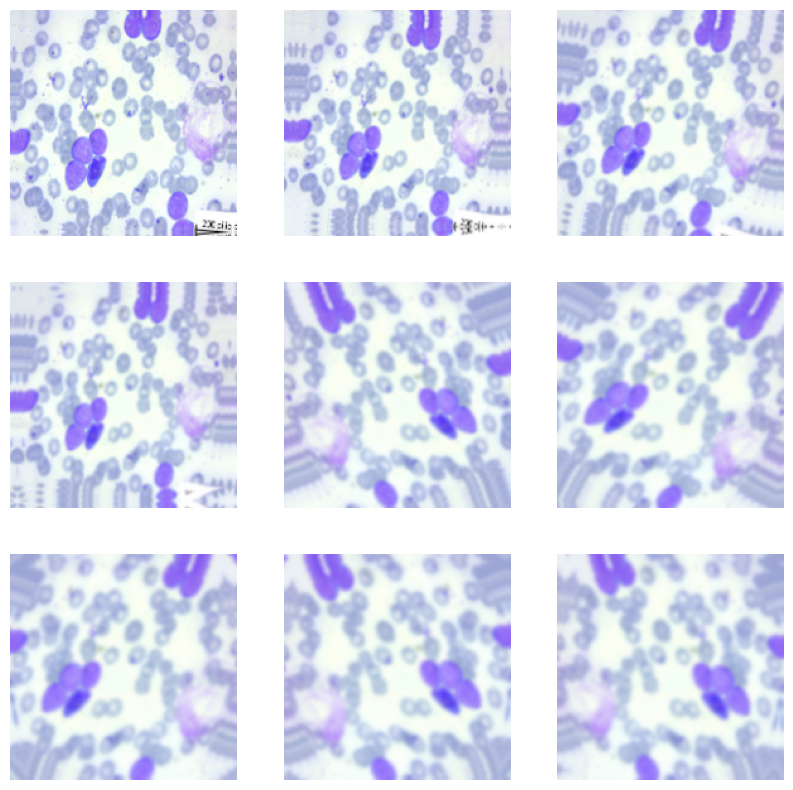

In [10]:
i=0
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    images=data_augmentation(images)
    plt.subplot(3,3,i+1)
    plt.imshow(images[0].numpy().astype('uint8'))
    plt.axis('off')

built the model


In [11]:
model=Sequential([
                  data_augmentation,
                  layers.Rescaling(1./255),
                  layers.Conv2D(16,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(32,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Conv2D(64,3,padding='same',activation='relu'),
                  layers.MaxPooling2D(),
                  layers.Dropout(0.2),
                  layers.Flatten(),
                  layers.Dense(128),
                  layers.Dense(len(blood_cell))])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

check summary

In [14]:
#model.summary()

training the model

In [15]:
history=model.fit(train_ds,epochs=25,validation_data=val_ds)

Epoch 1/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 40s 386ms/step - accuracy: 0.3585 - loss: 3.1150 - val_accuracy: 0.6386 - val_loss: 0.8175
Epoch 2/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 325ms/step - accuracy: 0.6922 - loss: 0.7673 - val_accuracy: 0.7523 - val_loss: 0.6511
Epoch 3/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 328ms/step - accuracy: 0.7305 - loss: 0.6406 - val_accuracy: 0.7617 - val_loss: 0.6164
Epoch 4/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 330ms/step - accuracy: 0.7421 - loss: 0.6289 - val_accuracy: 0.7695 - val_loss: 0.5488
Epoch 5/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 327ms/step - accuracy: 0.8006 - loss: 0.4949 - val_accuracy: 0.8707 - val_loss: 0.4294
Epoch 6/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 26s 326ms/step - accuracy: 0.8488 - loss: 0.4256 - val_accuracy: 0.8302 - val_loss: 0.4370
Epoch 7/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 328ms/step - accuracy: 0.8453 - loss: 0.4072 - val_accuracy: 0.8769 - val_loss: 0.3591
Epoch 8/25
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 353ms/step - accuracy: 0.8850 - loss: 0.3465 - val_accu

In [16]:
model.save("blood_cell_cancer.h5")